# Honors Project CS401/L

Student will attempt to make a machine learning decision algorithm to determine if a new picture (not from the training data) is a picture of person A or person B.

A - Fully implements decision algorithm with reasonable accuracy (>75%).
B - Shows a strong understanding of the concepts and is able to construct eigen images.
C - Shows a reasonable understanding of the concepts but is unable to make tangible progress.

This project will be 15% of the course grade and due at the time of and in addition to the final exam.


In [34]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

# Training Data
I am using 20 photos of myself and 20 photos of my roommate as training data <br><br>
I have cropped the photos to *188 x 150*, or at least I tried to because some 5:4 aspect ratio kept spitting out anywhere from *186 x 150* to *189 x 150* <br>
Because of this I have cropped all the photos in code to *186 x 150*

(40, 186, 150)


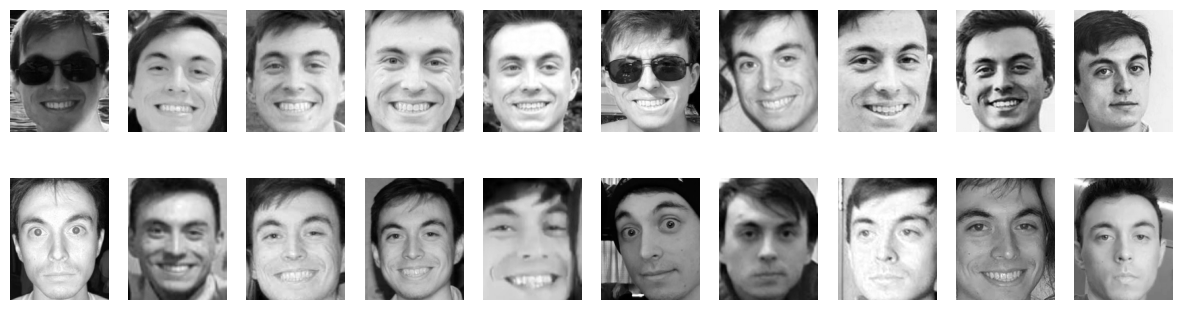

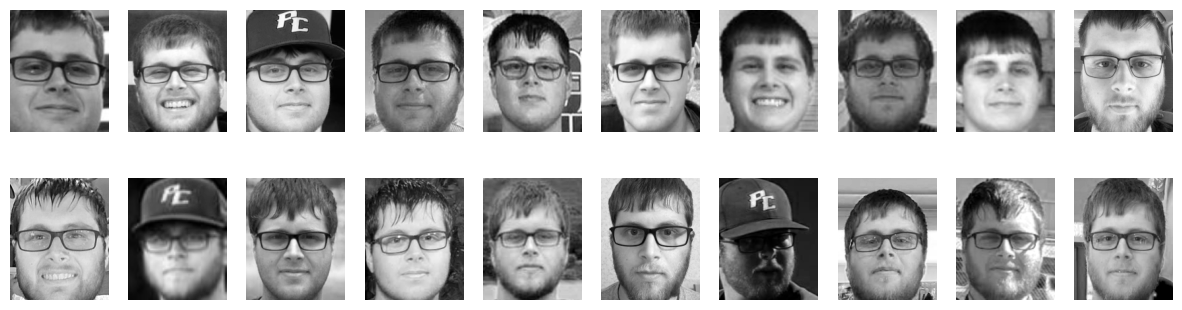

In [35]:
# Number of photos of each person
N = 20

# Cropped photo size
m = 186
n = 150

images=[]
for i in range(N):
    images.append(imread(f"./CroppedPhotos/Aidan/aidan{i+1:02d}.png")[:m,:n,0]) # Crop the photo to 186 x 150 (Photos have been pre-cropped but vary by few pixels)

for i in range(N):
    images.append(imread(f"./CroppedPhotos/Clay/clay{i+1:02d}.png")[:m,:n,0]) # This returns a third dimension, which is rgb color channel. Here I am only appending one of the channels


trainingData = np.array(images)

print(trainingData.shape)

plt.figure(figsize=(15,4))
for i in range(N):
    plt.subplot(2,10,i+1)
    plt.imshow(trainingData[i]).set_cmap("gray")
    plt.axis("off")
plt.show()
plt.figure(figsize=(15,4))
for i in range(N):
    plt.subplot(2,10,i+1)
    plt.imshow(trainingData[i+N]).set_cmap("gray")
    plt.axis("off")
plt.show()

# Average Face
Here I calculate the average face by using numpy's mean method. This returns some nightmare fuel

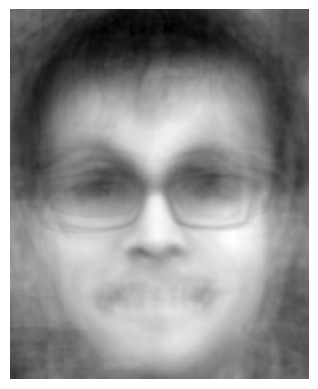

In [36]:
avgFace = np.mean(trainingData, axis=0)

plt.imshow(avgFace).set_cmap("gray")
plt.axis("off")
plt.show()


# Flattening
Here I am flattening the matricies <br><br>

trainingData is a 3D matrix as the photos are represented as 2D matricies. I reshape each photo by "pulling" it into a vector of a 2D matrix <br><br>
avgFace is a 2D matrix (a single photo) that is "pulled" into a vector

In [37]:
trainingData = trainingData.reshape([trainingData.shape[0], m*n])
print(trainingData.shape)

avgFace = avgFace.reshape([1,m*n])
print(avgFace.shape)

(40, 27900)
(1, 27900)


Get the mean centered data by subtracting the average face from each face in the training data

In [38]:
B = trainingData.T - np.tile(avgFace.T, trainingData.shape[0])
print(B.shape)

(27900, 40)


# Calculate SVD
Compute the SVD for the mean centered data using numpy. This returns 3 matrices

In [39]:
U, S, Vt = np.linalg.svd(B, full_matrices=False)

print(U.shape)
print(S.shape)
print(Vt.shape)

(27900, 40)
(40,)
(40, 40)


# Eigenfaces
Show first 9 Eigenfaces

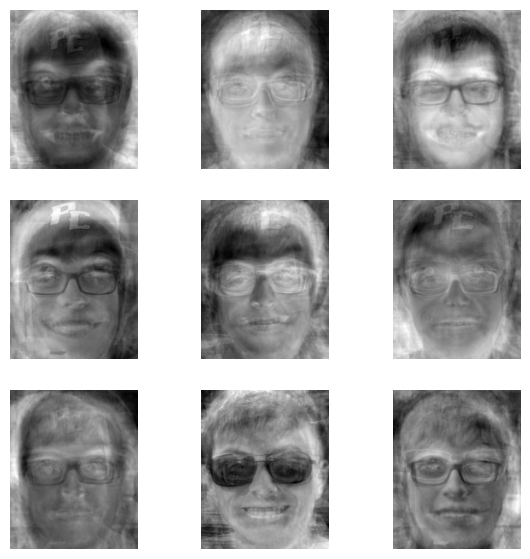

In [40]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(U[:,i].reshape([m,n])).set_cmap("gray")
    plt.axis("off")
plt.show()

# PCA
Plot the Principle Components (I've chosen PC 2, 3, and 4 because of the seperation that appears on the graph)

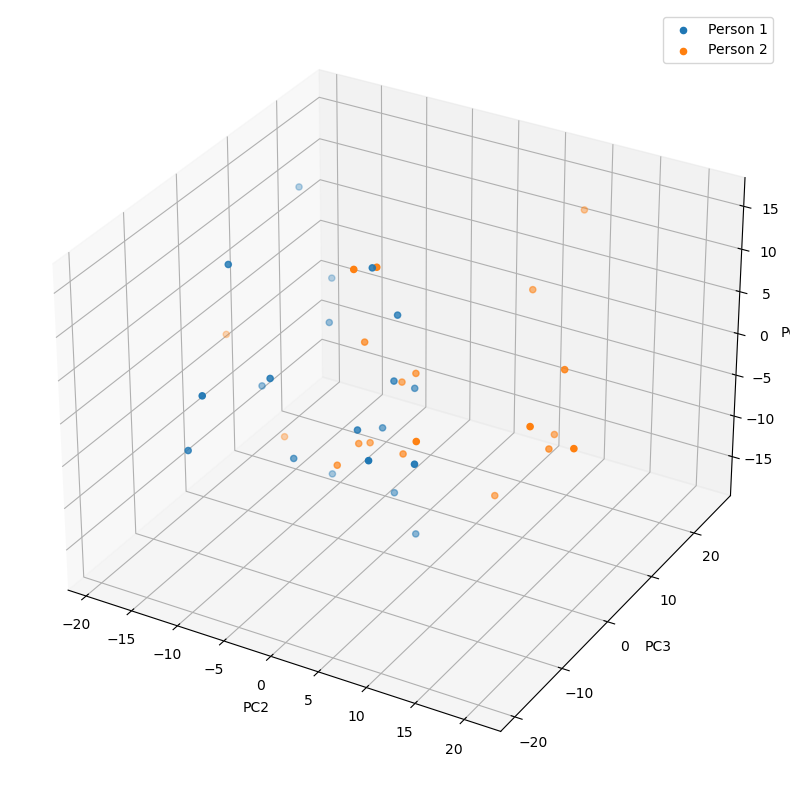

In [41]:

PC = [2,3,4] # Principle Components to plot

p1 = np.zeros([3,N])
for i in range(N):
    imvec = B[:,i]
    p1[:,i] = (imvec@U[:,PC])

p2 = np.zeros([3,N])
for i in range(N):
    imvec = B[:,i+N]
    p2[:,i] = (imvec@U[:,PC])

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection="3d")
ax.set_xlabel(f"PC{PC[0]}")
ax.set_ylabel(f"PC{PC[1]}")
ax.set_zlabel(f"PC{PC[2]}")

ax.scatter(*p1, label="Person 1") # Plot all points for person 1
ax.scatter(*p2, label="Person 2") # PLot all points for person 2

ax.legend()

plt.show()


# Test Faces
Import two new faces of person 1 and 2 that were not in the training data

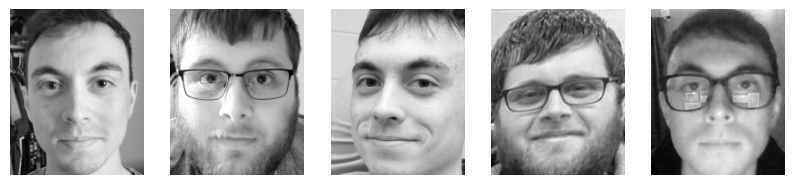

In [42]:
testFaces = []

testFaces.append(imread("./CroppedPhotos/Aidan/test.png")[:m,:n,0].reshape([1,m*n]))
testFaces.append(imread("./CroppedPhotos/Clay/test.png")[:m,:n,0].reshape([1,m*n]))
testFaces.append(imread("./CroppedPhotos/Aidan/test3.png")[:m,:n,0].reshape([1,m*n]))
testFaces.append(imread("./CroppedPhotos/Clay/test2.png")[:m,:n,0].reshape([1,m*n]))
testFaces.append(imread("./CroppedPhotos/Aidan/test2.png")[:m,:n,0].reshape([1,m*n]))

plt.figure(figsize=(10,10))
for i in range(len(testFaces)):
    plt.subplot(1,5,i+1)
    plt.imshow(testFaces[i].reshape([m,n])).set_cmap("gray")
    plt.axis("off")
plt.show()

Now to plot faces not in the training data to see where they fall

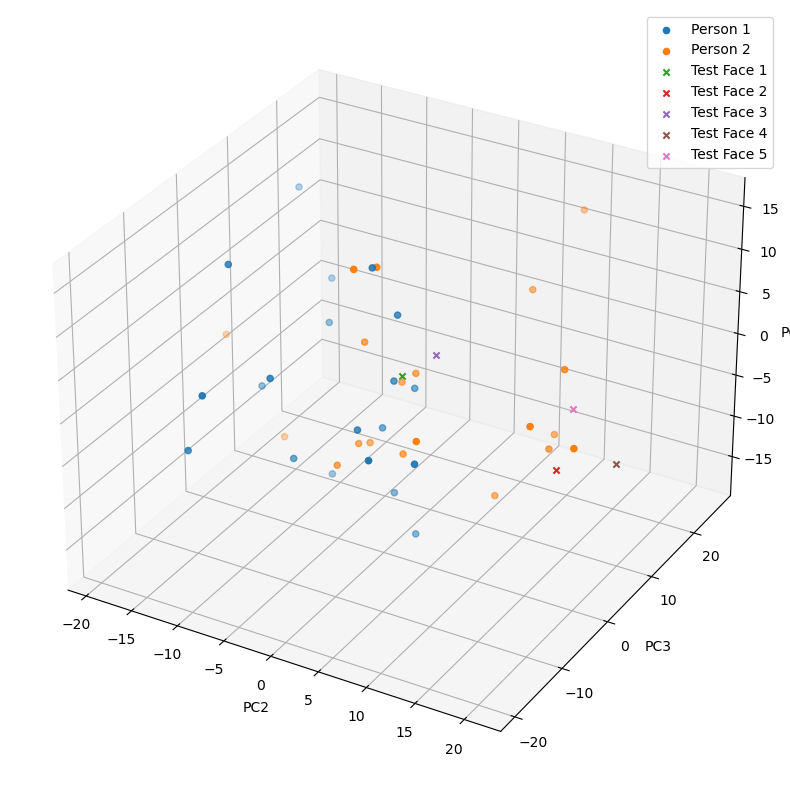

In [43]:
# Replot the original training data
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(projection="3d")
ax.set_xlabel(f"PC{PC[0]}")
ax.set_ylabel(f"PC{PC[1]}")
ax.set_zlabel(f"PC{PC[2]}")

ax.scatter(*p1, label="Person 1") # Plot all points for person 1
ax.scatter(*p2, label="Person 2") # PLot all points for person 2

# Plot the test faces
tps = []
for i in range(len(testFaces)):
    tps.append((testFaces[i]@U[:,PC]).T)

for i, choords in enumerate(tps):
    ax.scatter(*choords, marker="x", label=f"Test Face {i+1}")

ax.legend()

plt.show()

# Prediction
Use the K nearest neighbor decision algorithm to determine if the test point is Person 1 or Person 2

In [44]:
# k is the number of nearest neighbors to check
k = 5

# List of expected values of predictions
expected = ["Person 1", "Person 2", "Person 1", "Person 2", "Person 1"]


for i in range(len(tps)):

    # Determine the distances of the test point to neighbors and categorize neighbors as person 1 or person 2
    distances = {}
    for choords in p1.T:
        distances[np.linalg.norm(choords-tps[i].T)] = "Person 1" # np.linalg.norm returns the length of a given vector, which here is test point 1 - person 1 choords

    for choords in p2.T:
        distances[np.linalg.norm(choords-tps[i].T)] = "Person 2"

    # Sort distances to determine the nearest neighbors and only keep the first k items
    sortedDistances = dict(sorted(distances.items())[:k])


    # Count categories that are person 1, if majority it is person 1 else person 2
    count = 0
    for category in sortedDistances.values():
        if category == "Person 1": count+= 1

    result = "Person 1" if count > k/2 else "Person 2" # Needs to get more than half to have the majority
        
    print(f"Expected: {expected[i]}\nResult: {result}\n{'Correct!' if expected[i] == result else 'Incorrect.'}\n")


Expected: Person 1
Result: Person 1
Correct!

Expected: Person 2
Result: Person 2
Correct!

Expected: Person 1
Result: Person 1
Correct!

Expected: Person 2
Result: Person 2
Correct!

Expected: Person 1
Result: Person 2
Incorrect.



# Tada!
It gets it correct about 80% of the time. I believe the last one was predicted incorrectly because of my glasses, which was a noteable trait of person 2